In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud   

In [3]:
import jieba   ## 結巴是一個可以用來斷詞的package

In [4]:
## 載入結巴的繁體中文詞庫

In [5]:
jieba.set_dictionary('D:/計算機程式/dict.txt.big.txt')

## 讀入想要做成文字雲的檔案

In [6]:
## 使用的文本是<中國的宗教>閱讀心得

In [17]:
text = open('日記.txt', "r", encoding="big5", errors='ignore')    

In [8]:
## 這裡遇到很多編碼問題:utf-8 和 big5不知道為甚麼有的可以有的不行(後來把記事本通通用UTF-8另存新檔好像就沒問題了)

In [18]:
essay = text.read()

## 設定停用詞：
．有些詞彙常用但是在文本分析中可能沒有意義,所以先把這些詞做成一個檔案並避免,他們出現在文字雲之中

In [10]:
with open('D:/計算機程式/stop.words.txt', "r", encoding="utf-8", errors = 'ignore') as f:      
    stops = f.read().split('\n')

In [11]:
list(stops)

['$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '１',
 '２',
 '３',
 '４',
 '５',
 '６',
 '７',
 '８',
 '９',
 '０',
 '的',
 '的',
 '在',
 '是',
 '與',
 '是',
 '一',
 '一些',
 '一何',
 '一切',
 '一則',
 '一方面',
 '一旦',
 '一來',
 '一樣',
 '一般',
 '一轉眼',
 '萬一',
 '上',
 '上下',
 '下',
 '不',
 '不僅',
 '不但',
 '不光',
 '不單',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不盡',
 '不盡然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不獨',
 '不管',
 '不至於',
 '不若',
 '不論',
 '不過',
 '不問',
 '與',
 '與其',
 '與其說',
 '與否',
 '與此同時',
 '且',
 '且不說',
 '且說',
 '兩者',
 '個',
 '個別',
 '臨',
 '為',
 '為了',
 '為什麼',
 '為何',
 '為止',
 '為此',
 '為著',
 '乃',
 '乃至',
 '乃至於',
 '麼',
 '之',
 '之一',
 '之所以',
 '之類',
 '烏乎',
 '乎',
 '乘',
 '也',
 '也好',
 '也罷',
 '了',
 '二來',
 '於',
 '於是',
 '於是乎',
 '云云',
 '云爾',
 '些',
 '亦',
 '人',
 '人們',
 '人家',
 '什麼',
 '什麼樣',
 '今',
 '介於',
 '仍',
 '仍舊',
 '從',
 '從此',
 '從而',
 '他',
 '他人',
 '他們',
 '以',
 '以上',
 '以為',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以來',
 '以至',
 '以至於',
 '以致',
 '們',
 '任',
 '任何',
 '任憑',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以'

In [12]:
terms = []

In [14]:
from collections import Counter

In [19]:
word = jieba.cut(essay, cut_all = False)
print("預設模式"+  "|".join(word))

預設模式　|　|最近|有個|想法|，|就是|希望|用|文字|去|記錄|這個|年齡|所|發生|的|事情|，|一些|僅|屬於|這個|年紀|的|的|想法|。|或許|這|可以|用|青春|的|搖擺不定|與|躍|動感|來|形容|吧|。|感覺|要|趁|著|有|想法|的|時候|，|寫個|故事|吧|，|那些|青春|和|熱血|，|悸動|和|惆悵|，|試圖|在|現實|的|枯燥|中|投入|幻想|不乏|是|個|好|方法|
|　|　|那些|，|存|在於|空想|的|，|從|虛幻|中|釋放|∼|2016|/|7|/|29|
|雜感|
|　|　|最近|新來|的|歷史|老師|喜歡|用|重點式|的|教法|，|一點一點|的|把|課本|的|重點|寫|了|整個|黑板|，|「|來|，|這個|畫|起來|，|用|紅筆|給他畫|三星|，|這個|考試|一定|會考|！|」|有|的|時候|常常|會想|，|考試|的|目的|是|「|為|了|檢測|某個|階段|的|學習|況|」|，|如果|是|因為|要|考試|所以|才|授課|，|似乎|是|違反|了|教育|所|設計|的|考試|，|一|但|扭曲|了|他|的|本意|，|考試|自然|就|背|負上|惡名|，|如果|是|因為|學習|而|設立|考試|，|會|不會|能|讓|學生|更能|接受|這樣|的|體制|？|然而|教育|就是|忤逆|人性|，|不道德|的|，|但是|這麼|做|的|背後|，|是|因為|對|學習|有|期許|，|對|教育|有願景|，|或許|只能|希望|越來越|好|吧|？|
|　|　|從台|中|回來|以後|正式|的|第一天|，|預期|之中|的|無聊|，|如果|要|我|回答|這個|暑假|做|了|甚麼|有|意義|的|事|大約|也|就|那|幾項|，|不是|都|寫|在|紙上|了|嗎|？|這樣|記載下來|說真的|有意思|的|幾乎|也|沒有|吧|。|
|　|　|我|這個|人|似乎|就是|一板|正經|的|，|和|甚麼|「|好|青春|好|熱血|」|扯不上|邊|，|即使|是|幻想|也好|總是|期望|能|有|動畫|裡|青春|洋溢|的|高中|生活|，|但是|每次|這樣|想著|就|總是|做|不到|，|害怕|犯錯|害怕|如果|，|如果|如何|又|怎麼|結果|的|顧慮|實在|是|甩不開|，|有|這樣|多慮|的|想法|大概|就|不會|有|特別|值得紀念|的|事情|發生|在|自己|的|身上|，|於是|，|高一|就|這樣|

In [20]:
print("停用詞"+  "|".join(stops))     ## 看一下把那些單詞停用掉

停用詞$|0|1|2|3|4|5|6|7|8|9|１|２|３|４|５|６|７|８|９|０|的|的|在|是|與|是|一|一些|一何|一切|一則|一方面|一旦|一來|一樣|一般|一轉眼|萬一|上|上下|下|不|不僅|不但|不光|不單|不只|不外乎|不如|不妨|不盡|不盡然|不得|不怕|不惟|不成|不拘|不料|不是|不比|不然|不特|不獨|不管|不至於|不若|不論|不過|不問|與|與其|與其說|與否|與此同時|且|且不說|且說|兩者|個|個別|臨|為|為了|為什麼|為何|為止|為此|為著|乃|乃至|乃至於|麼|之|之一|之所以|之類|烏乎|乎|乘|也|也好|也罷|了|二來|於|於是|於是乎|云云|云爾|些|亦|人|人們|人家|什麼|什麼樣|今|介於|仍|仍舊|從|從此|從而|他|他人|他們|以|以上|以為|以便|以免|以及|以故|以期|以來|以至|以至於|以致|們|任|任何|任憑|似的|但|但凡|但是|何|何以|何況|何處|何時|余外|作為|你|你們|使|使得|例如|依|依據|依照|便於|俺|俺們|倘|倘使|倘或|倘然|倘若|借|假使|假如|假若|儻然|像|兒|先不先|光是|全體|全部|兮|關於|其|其一|其中|其二|其他|其餘|其它|其次|具體地說|具體說來|兼之|內|再|再其次|再則|再有|再者|再者說|再說|冒|沖|況且|幾|幾時|凡|凡是|憑|憑藉|出於|出來|分別|則|則甚|別|別人|別處|別是|別的|別管|別說|到|前後|前此|前者|加之|加以|即|即令|即使|即便|即如|即或|即若|卻|去|又|又及|及|及其|及至|反之|反而|反過來|反過來說|受到|另|另一方面|另外|另悉|只|只當|只怕|只是|只有|只消|只要|只限|叫|叮咚|可|可以|可是|可見|各|各個|各位|各種|各自|同|同時|後|後者|向|向使|向著|嚇|嗎|否則|吧|吧噠|吱|呀|呃|嘔|唄|嗚|嗚呼|呢|呵|呵呵|呸|呼哧|咋|和|咚|咦|咧|咱|咱們|咳|哇|哈|哈哈|哉|哎|哎呀|哎喲|嘩|喲|哦|哩|哪|哪個|哪些|哪兒|哪天|哪年|哪怕|哪樣|哪邊|哪裡|哼|哼唷|唉|唯有|啊|啐|啥|啦|啪達|啷噹|喂|喏|喔唷|嘍|嗡|嗡嗡|嗬|嗯|噯|嘎|嘎登|噓|嘛|嘻|嘿|嘿嘿|因|因為|因了|因此|因著|因而|固然|在|在下|在於|地|基於|處在|多|多麼|多少|大|大家|她|她們|好

In [21]:
for word in jieba.cut(essay, cut_all = False):
    if word not in stops:
        terms.append(word)

In [22]:
terms

['\u3000',
 '\u3000',
 '最近',
 '有個',
 '想法',
 '希望',
 '文字',
 '記錄',
 '年齡',
 '發生',
 '事情',
 '僅',
 '屬於',
 '年紀',
 '想法',
 '或許',
 '青春',
 '搖擺不定',
 '躍',
 '動感',
 '形容',
 '感覺',
 '想法',
 '寫個',
 '故事',
 '青春',
 '熱血',
 '悸動',
 '惆悵',
 '試圖',
 '現實',
 '枯燥',
 '中',
 '投入',
 '幻想',
 '不乏',
 '方法',
 '\n',
 '\u3000',
 '\u3000',
 '存',
 '空想',
 '虛幻',
 '中',
 '釋放',
 '∼',
 '2016',
 '29',
 '\n',
 '雜感',
 '\n',
 '\u3000',
 '\u3000',
 '最近',
 '新來',
 '歷史',
 '老師',
 '喜歡',
 '重點式',
 '教法',
 '一點一點',
 '課本',
 '重點',
 '寫',
 '整個',
 '黑板',
 '畫',
 '起來',
 '紅筆',
 '給他畫',
 '三星',
 '考試',
 '一定',
 '會考',
 '常常',
 '會想',
 '考試',
 '目的',
 '檢測',
 '階段',
 '學習',
 '況',
 '考試',
 '授課',
 '似乎',
 '違反',
 '教育',
 '設計',
 '考試',
 '扭曲',
 '本意',
 '考試',
 '自然',
 '背',
 '負上',
 '惡名',
 '學習',
 '設立',
 '考試',
 '會',
 '不會',
 '學生',
 '更能',
 '接受',
 '體制',
 '教育',
 '忤逆',
 '人性',
 '不道德',
 '做',
 '背後',
 '學習',
 '期許',
 '教育',
 '有願景',
 '或許',
 '只能',
 '希望',
 '越來越',
 '\n',
 '\u3000',
 '\u3000',
 '從台',
 '中',
 '回來',
 '以後',
 '正式',
 '第一天',
 '預期',
 '之中',
 '無聊',
 '回答',
 '暑假',
 '做',
 '意義',
 '事',
 '大約',
 '幾項',
 '寫',

In [23]:
diction = Counter(terms)

In [24]:
print(diction)       ## 篩選出來的字，和他們個別使用的次數

Counter({'\u3000': 1599, '─': 966, '\n': 829, '說': 685, '覺得': 523, '會': 486, '沒有': 432, '生活': 425, '知道': 416, '事情': 352, '今天': 328, '真的': 327, '做': 316, '之後': 305, '想': 302, '一個': 293, '感覺': 256, '∼': 203, '現在': 198, '時間': 187, '其實': 185, '中': 184, '應該': 179, '不會': 175, '這種': 171, '喜歡': 164, '很多': 163, '事': 157, '沒': 156, '非常': 156, '已經': 149, '社團': 147, ' ': 146, '一直': 144, '學校': 143, '大概': 138, '表演': 136, '青春': 135, '整個': 132, '希望': 129, '2017': 121, '或許': 113, '最近': 112, '蠻': 103, '人生': 103, '結束': 102, '那種': 102, '更': 100, '想到': 97, '最後': 95, '完': 95, '確實': 93, '話': 92, '完全': 91, '教室': 89, '寫': 88, '高中': 88, '太': 88, '一種': 87, '準備': 86, '東西': 85, '老師': 84, '學生': 84, '心情': 84, '問題': 84, '之中': 83, '總是': 81, '可能': 81, '特別': 80, '算是': 80, '一起': 80, '感到': 80, '跳': 78, '也許': 77, '比較': 76, '開心': 76, '像是': 76, '未來': 75, '明天': 75, '之前': 74, '能夠': 73, '想法': 72, '這件': 72, '根本': 72, '關係': 71, '令人': 71, '這是': 71, '回憶': 70, '事物': 69, '意義': 68, '看到': 67, '直接': 67, '好像': 66, '辦法': 66, '必須': 66, '畢竟

In [26]:
diction.most_common()

[('\u3000', 1599),
 ('─', 966),
 ('\n', 829),
 ('說', 685),
 ('覺得', 523),
 ('會', 486),
 ('沒有', 432),
 ('生活', 425),
 ('知道', 416),
 ('事情', 352),
 ('今天', 328),
 ('真的', 327),
 ('做', 316),
 ('之後', 305),
 ('想', 302),
 ('一個', 293),
 ('感覺', 256),
 ('∼', 203),
 ('現在', 198),
 ('時間', 187),
 ('其實', 185),
 ('中', 184),
 ('應該', 179),
 ('不會', 175),
 ('這種', 171),
 ('喜歡', 164),
 ('很多', 163),
 ('事', 157),
 ('沒', 156),
 ('非常', 156),
 ('已經', 149),
 ('社團', 147),
 (' ', 146),
 ('一直', 144),
 ('學校', 143),
 ('大概', 138),
 ('表演', 136),
 ('青春', 135),
 ('整個', 132),
 ('希望', 129),
 ('2017', 121),
 ('或許', 113),
 ('最近', 112),
 ('蠻', 103),
 ('人生', 103),
 ('結束', 102),
 ('那種', 102),
 ('更', 100),
 ('想到', 97),
 ('最後', 95),
 ('完', 95),
 ('確實', 93),
 ('話', 92),
 ('完全', 91),
 ('教室', 89),
 ('寫', 88),
 ('高中', 88),
 ('太', 88),
 ('一種', 87),
 ('準備', 86),
 ('東西', 85),
 ('老師', 84),
 ('學生', 84),
 ('心情', 84),
 ('問題', 84),
 ('之中', 83),
 ('總是', 81),
 ('可能', 81),
 ('特別', 80),
 ('算是', 80),
 ('一起', 80),
 ('感到', 80),
 ('跳', 78),
 ('也許', 77),


## 文字雲的形狀

In [27]:
from PIL import Image 

In [ ]:
## 要確定圖片是png檔,才能成功畫出圖形

In [30]:
mask = np.array(Image.open("star.png"))

In [31]:
mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

## 字體

In [ ]:
## 字體設定這裡也試了很多次 不知道為甚麼標楷體就是可以 其他有些不行 例如新細明體或宋思源體(OSError)

In [28]:
font = "C:/Windows/Fonts/kaiu.ttf"

In [32]:
wordcloud = WordCloud(background_color = "white", mask = mask, font_path = font)

In [33]:
wordcloud.generate_from_frequencies(diction)

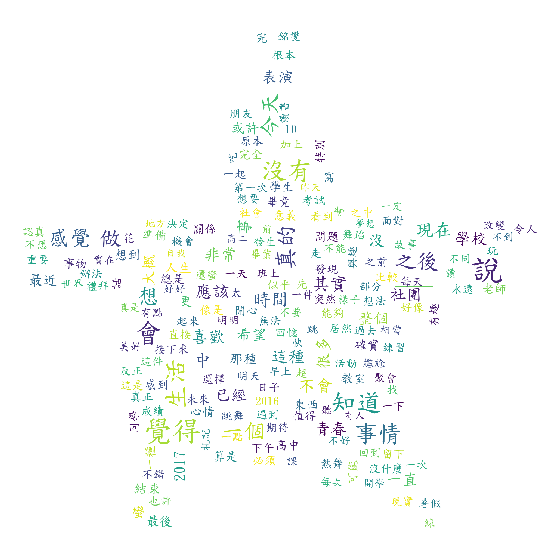

In [34]:
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("中國的宗教文字雲.png")

In [ ]:
## 為甚麼圖片的星形有點跑掉呢?
## 要怎麼樣改變文字雲的文字顏色呢?(沒辦法直接套用cmap)